In [14]:
import json
import time
import pandas as pd
from collections import Counter
import torch

import pandas as pd
import numpy as np
import nltk
import string
import re
import emoji
import torch
import json
import time
import numpy as np

from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch

#import April12.ipynb
#%store -r icd_grouped 
import statsmodels.api as sm
from patsy import dmatrices 

# model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

import seaborn



[]


In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [16]:
# Basic data files and paths
TOP_100_PATH = '../data/popular_100_memes.csv'
TOP_100 = pd.read_csv(TOP_100_PATH, encoding = "ISO-8859-1")
DATA_PATH = '../data/memes/'

STATS_PATH = '../data/statistics.json'  #statistics.json
with open(STATS_PATH, 'r') as f:
    STATS = json.load(f)
print(TOP_100.head())

          ID                   Name  \
0  112126428   Distracted Boyfriend   
1     438680  Batman Slapping Robin   
2   87743020            Two Buttons   
3  181913649    Drake Hotline Bling   
4      61579    One Does Not Simply   

                                     Alternate Names  
0  distracted bf, guy checking out another girl, ...  
1                                                NaN  
2  2 red buttons, choice button, which button, da...  
3  drakeposting, drakepost, drake hotline approve...  
4  one does not simply walk into morder, lord of ...  


In [17]:
memes_count = Counter(STATS['memes'])
print(len(STATS['memes']))
for f, c in memes_count.most_common():
    print(f)
    #print(f, c)

99
Bad-Luck-Brian.json
One-Does-Not-Simply.json
Philosoraptor.json
Boardroom-Meeting-Suggestion.json
Futurama-Fry.json
First-World-Problems.json
The-Most-Interesting-Man-In-The-World.json
Batman-Slapping-Robin.json
Bad-Pun-Dog.json
X-X-Everywhere.json
Expanding-Brain.json
Two-Buttons.json
But-Thats-None-Of-My-Business.json
Ancient-Aliens.json
Creepy-Condescending-Wonka.json
Grumpy-Cat.json
Y-U-No.json
The-Rock-Driving.json
That-Would-Be-Great.json
Waiting-Skeleton.json
Change-My-Mind.json
Leonardo-Dicaprio-Cheers.json
10-Guy.json
Captain-Picard-Facepalm.json
Matrix-Morpheus.json
Third-World-Skeptical-Kid.json
Confession-Bear.json
Am-I-The-Only-One-Around-Here.json
Success-Kid.json
Hide-the-Pain-Harold.json
Roll-Safe-Think-About-It.json
Evil-Toddler.json
Awkward-Moment-Sealion.json
Face-You-Make-Robert-Downey-Jr.json
Mocking-Spongebob.json
Disaster-Girl.json
Blank-Nut-Button.json
Dont-You-Squidward.json
Inhaling-Seagull.json
Back-In-My-Day.json
Grandma-Finds-The-Internet.json
Brace-Your

In [18]:
memes = []
for f, c in memes_count.most_common():
    memes.append(f)
    
selected_memes = memes

def open_data(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

memes_data = [open_data(DATA_PATH + meme) for meme in selected_memes]   

In [19]:
# Preprocessing data for modelling
from nltk import sent_tokenize, word_tokenize
from gensim.models import Word2Vec

In [20]:
def parse_text(text):
    text = text.lower().strip()
    return word_tokenize(text)

def parse_blocks(blocks):
    result = []
    for i,b in enumerate(blocks):
        result.append(parse_text(b))
#         if i < len(blocks) - 1:
#             result.extend('|')
    return result

ex = parse_blocks(memes_data[0][0]['boxes'])
print(ex)
model = Word2Vec(ex, min_count=1)
print(model)

[['gets', 'covid', '19', 'and', 'recovers'], ['dies', 'from', 'complications', 'related', 'to', 'the', 'common', 'cold', '.']]
Word2Vec(vocab=14, size=100, alpha=0.025)


# Most Frequent Words

In [21]:
ex = 'one'
ex1 = 'two'
print(ex+ ' '+ ex1)

one two


In [22]:
memes_data[0][0]['boxes']

['GETS COVID 19 AND RECOVERS',
 'DIES FROM COMPLICATIONS RELATED TO THE COMMON COLD.']

In [23]:
#each format is a element in array 
#then concetenate all box strings of a meme format, amke it into a single stringle 

allwords_memeformat = []
#onestring_memeformat = ''

for i in range(len(memes_data)):
    eachformat_string = ''
    
    for ele in memes_data[i]:
        #print("This is ele: " + str(ele))
        box = ele['boxes']
        
        string = ' '.join(box)
        eachformat_string = eachformat_string + ' ' + string
        #eachformat_string = eachformat_string + string
    
    allwords_memeformat.append(eachformat_string)

In [42]:
#allwords_memeformat[1]

In [25]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
   # cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
   # vec = CountVectorizer().fit(corpus)
    vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
   
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
for i in range(len(allwords_memeformat)):
    print('\n')
    print("Meme format: " + str(i))
    common_words = get_top_n_words([allwords_memeformat[i]], 40) #input should be an array not a string
    for word, freq in common_words:
        print(word, freq)



Meme format: 0
gets 8566
his 5405
by 2734
him 2609
he 2581
goes 2194
with 2161
up 1903
out 1871
meme 1730
has 1654
finally 1416
you 1371
get 1352
from 1340
an 1293
first 1282
as 1192
makes 1166
day 1116
one 1059
dies 987
finds 986
girl 941
when 918
no 914
into 862
my 818
she 788
wins 784
life 777
luck 766
buys 762
can 760
still 759
new 752
got 751
school 747
doesn 735
time 722


Meme format: 1
not 21291
one 21100
simply 19688
does 19227
you 3350
without 2198
meme 1966
get 1685
make 1617
this 1512
with 1445
have 1196
your 1156
when 1084
an 992
their 979
my 955
bruh 955
like 952
do 951
just 872
they 850
memes 847
go 808
me 802
eat 764
say 716
up 703
out 651
if 638
how 600
what 582
can 576
about 572
no 568
from 552
into 550
use 549
watch 517
play 510


Meme format: 2
if 12450
you 5740
why 3364
do 2762
what 2690
does 2650
they 2499
would 2132
then 1772
have 1762
we 1656
people 1646
can 1641
when 1603
or 1532
how 1521
make 1438
an 1275
mean 1184
there 1152
your 1141
with 1106
called 1088


you 3555
when 3344
your 1266
my 1117
they 760
me 673
someone 610
have 569
just 545
people 545
but 529
not 517
with 501
meme 461
this 421
get 421
can 420
so 392
what 391
why 389
out 374
about 371
he 364
one 360
says 354
don 350
make 350
no 350
up 346
an 346
do 343
how 342
like 316
re 310
if 306
we 300
see 293
moment 273
she 271
realize 269


Meme format: 24
you 9833
if 7379
what 7208
told 6902
your 966
not 826
have 553
can 552
just 505
there 406
don 392
my 391
with 390
people 382
this 377
as 340
no 322
they 317
meme 315
will 308
because 295
an 276
doesn 272
make 272
only 266
when 265
more 256
than 256
like 254
about 253
re 252
we 249
or 249
one 243
by 239
memes 235
were 233
but 230
me 216
do 214


Meme format: 25
you 6862
me 3955
so 3803
telling 2318
your 1976
re 1897
when 991
but 923
can 746
my 735
have 716
people 703
get 648
tell 590
if 583
they 572
what 566
mean 556
not 503
saying 461
do 437
don 413
with 411
say 372
this 369
just 355
about 354
like 354
want 351
we 323
from 306
there 

me 2653
everyone 1809
else 1504
my 810
you 799
when 776
your 369
out 232
up 225
with 202
everybody 168
because 168
get 167
opens 164
off 154
funeral 153
some 141
air 140
people 138
but 133
one 124
other 118
takes 118
from 113
fresh 112
gets 112
window 109
eats 107
see 105
mom 105
who 105
have 104
meme 103
friend 97
room 93
just 92
door 92
turns 91
plane 91
every 91


Meme format: 50
you 2221
when 1676
your 774
me 433
but 429
why 412
what 409
they 397
my 390
like 342
do 320
someone 314
get 263
have 262
so 245
says 240
just 227
don 226
girl 220
with 218
people 213
not 211
if 210
say 207
can 203
how 189
meme 184
no 183
make 174
teacher 172
watblack 157
out 152
we 149
or 147
then 147
up 147
about 143
re 140
one 136
she 135


Meme format: 51
you 1936
dad 929
son 890
my 804
me 630
no 561
your 539
why 518
we 496
have 472
do 443
but 439
will 433
what 428
they 413
don 410
know 382
can 375
yes 341
so 336
not 334
just 287
because 278
did 277
get 277
when 239
re 238
he 227
there 226
am 215
like 21

you 2855
get 2224
gets 558
when 408
everyone 391
an 324
everybody 263
your 217
meme 163
upvote 134
re 124
like 113
my 111
me 111
have 88
can 76
free 71
new 65
car 63
this 62
we 62
finally 61
out 60
school 55
life 54
go 53
one 52
getting 49
with 49
got 48
day 48
no 47
die 46
test 45
love 45
just 44
oprah 44
but 42
president 42
gun 40


Meme format: 75
you 2337
lie 1331
your 639
said 616
determined 582
detector 352
not 273
results 263
say 246
says 222
test 211
fact 200
this 189
have 180
my 174
were 164
when 146
but 139
father 138
re 126
we 122
with 104
an 104
they 103
if 101
has 100
me 97
no 93
claim 93
so 86
trump 85
would 85
he 83
here 79
about 79
don 78
out 77
asked 71
just 67
what 66


Meme format: 76
you 446
my 202
your 179
me 161
so 160
when 147
they 139
not 118
said 115
have 113
like 106
we 103
this 100
with 97
just 90
what 85
call 84
will 84
but 77
say 77
do 76
people 75
he 70
don 67
re 67
no 64
she 63
if 62
called 61
because 60
can 59
now 59
trump 57
get 56
about 54
one 53
an 53

when 101
you 100
me 82
waiting 65
my 48
quarantine 39
your 38
woof 35
with 30
day 29
but 29
have 21
no 21
after 20
just 18
like 18
during 17
friends 17
people 15
get 14
so 14
there 14
time 13
life 13
can 13
meme 13
go 13
re 13
out 13
now 12
this 12
still 12
social 11
end 11
coronavirus 11
an 10
do 10
don 10
about 10
or 10


In [ ]:
#vec.vocabulary_.items()

In [ ]:
#stop_words = text.ENGLISH_STOP_WORDS.union(punc)
#stop_words

In [28]:
len(allwords_memeformat)

99

In [29]:
type(allwords_memeformat[0])

str

# kmeans demo 3
https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['body_new']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

# kmeans demo 2
https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [32]:
documents = allwords_memeformat

#vocabuluary 
vectorizer = TfidfVectorizer(stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"], )  #vocabulary = 
#vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
X = vectorizer.fit_transform(documents) 
text = X

In [33]:
X.toarray().shape

(99, 117027)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


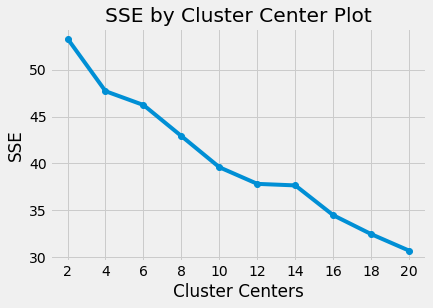

In [34]:
#Finding Optimal number of Clusters k 
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


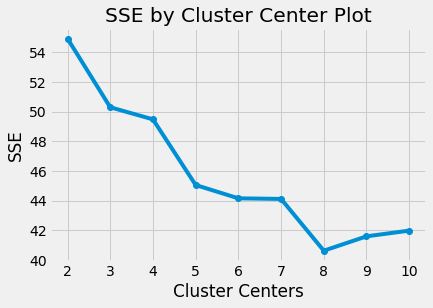

In [35]:
#different parameters
#Finding Optimal number of Clusters k 
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10)

In [36]:
k=6
clusters = MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit_predict(text)



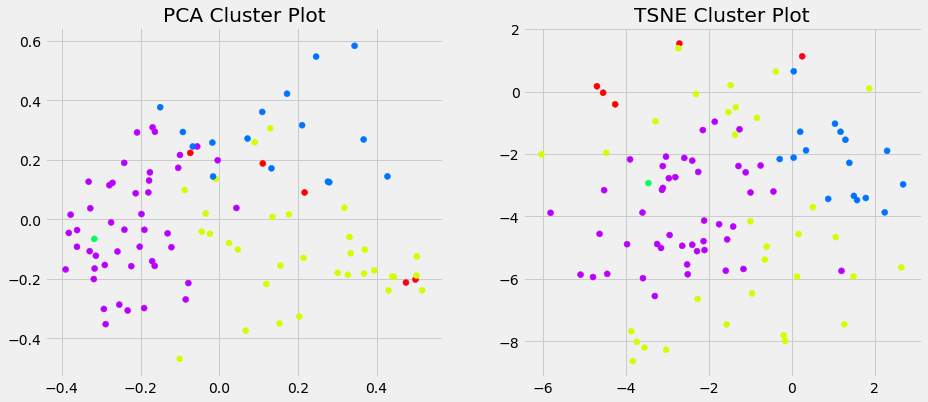

In [37]:
#plot clusters k=6
"""
Here we plot the clusters generated by our KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. In order to speed up the process with TSNE, I sample from 3,000 documents and perform a PCA 50 dimension reduction on the data first. Next I show a scatterplot further sampling the sample down to 300 points.
"""
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=99, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=99, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    


In [38]:
#Top Keywords
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, vectorizer.get_feature_names(), 20)


Cluster 0
have,until,after,with,get,quarantine,this,like,still,here,ll,your,woof,wait,just,my,me,you,when,waiting

Cluster 1
don,with,they,do,like,have,just,so,but,one,your,me,not,this,we,what,when,if,my,you

Cluster 2
like,meme,see,re,with,but,have,get,people,me,says,about,they,my,someone,your,make,face,when,you

Cluster 3
everyone,one,school,have,get,do,who,no,not,fortnite,meme,people,when,with,memes,this,your,my,you,me

Cluster 4
don,just,can,they,but,with,like,not,do,what,so,this,no,have,get,my,me,your,when,you

Cluster 5
everyone,has,my,meme,one,fo,no,dat,you,he,hey,aint,guy,this,ain,see,time,cares,got,nobody


In [39]:
k=8
clusters = MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit_predict(text)


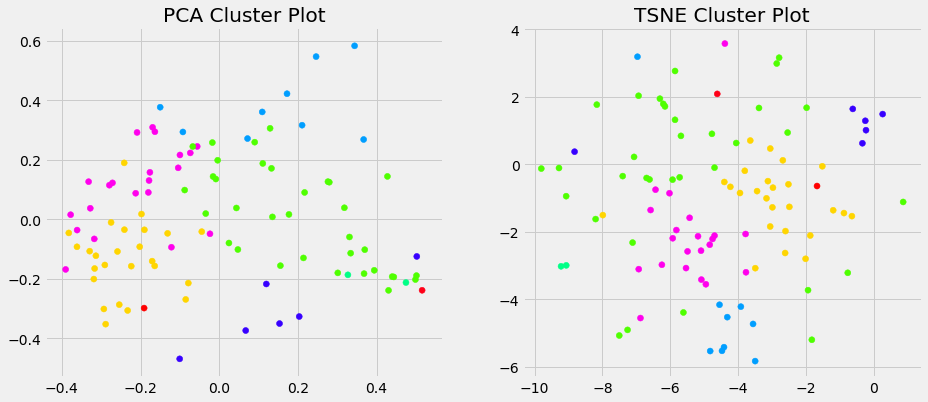

In [40]:
plot_tsne_pca(text, clusters)

In [41]:
get_top_keywords(text, clusters, vectorizer.get_feature_names(), 30)


Cluster 0
if,they,with,an,claimed,proves,we,re,lieslies,claim,but,when,father,were,my,have,this,determines,test,says,fact,say,not,results,said,your,detector,determined,lie,you

Cluster 1
because,people,why,he,will,how,we,re,want,they,but,don,with,like,if,this,no,just,can,what,do,not,have,when,so,get,my,me,your,you

Cluster 2
they,see,up,make,who,an,can,don,people,get,what,do,just,have,so,like,meme,we,but,not,memes,with,one,no,your,this,when,me,my,you

Cluster 3
but,some,get,do,meme,no,powdered,have,like,ya,ll,me,my,fo,your,when,memes,those,dat,anymore,aint,yall,you,them,ain,more,any,nobody,time,got

Cluster 4
being,why,fortnite,don,life,up,coronavirus,good,meme,school,stop,now,else,who,have,get,no,not,this,with,look,do,memes,people,everyone,when,your,my,you,me

Cluster 5
so,with,but,me,why,do,can,people,have,one,we,they,your,had,put,sure,could,just,when,where,told,great,or,this,not,my,would,what,you,if

Cluster 6
he,up,one,someone,people,don,meme,make,not,we,can,do,no,so,just,out,what

# Kmeans  demo 1
https://pythonprogramminglanguage.com/kmeans-text-clustering/

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
documents = allwords_memeformat

In [ ]:
#vocabulary set parameter of TfidfVectorizer: every word in all of meme formats

vectorizer = TfidfVectorizer(stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"], )  #vocabulary = 
#vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
X = vectorizer.fit_transform(documents) 

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
print("\n")
print("Prediction")

In [ ]:
Y = vectorizer.transform(["me waiting you everyone wait"])
prediction = model.predict(Y)
print(prediction)

# CountVecotrizer

In [ ]:
cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
count_vector=cv.fit_transform(allwords_memeformat)

In [ ]:
cv.vocabulary_

In [ ]:
cv.vocabulary_[0]

In [ ]:
count_vector.shape
wordcount = count_vector.toarray()
wordcount 

In [ ]:
wordcount2 = np.array(wordcount[0])
wordcount2.shape

In [ ]:
frequent_index = np.argpartition(wordcount2, -10)[-10:]
frequent_index

# get top n words

In [ ]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
   # cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
   # vec = CountVectorizer().fit(corpus)
    vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was"]).fit(corpus)
   
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#'Woman-Yelling-At-Cat.json',
common_words = get_top_n_words(allwords_memeformat, 20)
for word, freq in common_words:
    print(word, freq)

In [ ]:
# making X and y for RNN
word = []
y = []
for i in range(len(memes_data)):
    #print("This is i: " + str(i))
    for ele in memes_data[i]:
        y.append(i) 

        box = ele['boxes']
        parsedtext = parse_blocks(box)
        
        #appen all words in a box as to array2
        array2 = []
        for box_element in parsedtext:
            for box_word in box_element:
                array2.append(box_word)
        print(array2)        
        
        #each element in wordcontains all words of a box    
        word.append(array2)

X_words = word
print(word)
print(y) 

In [ ]:
X_words[0]

In [ ]:
len(y)

In [ ]:
len(X_words)

In [ ]:
yset = set(y)
yset

# Visualization

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
#categoryx = ['ARTHROPOD-BORNE VIRAL DISEASES', 'MALIGNANT NEOPLASM', 'MALIGNANT NEOPLASM OF RESPIRATORY SYSTEM', '20', '15']
fractiony = [32141/575948, 26186/575948, 19971/575948, 18164/575948, 17325/575948, 17272/575948, 15850/575948, 14802/575948, 13194/575948, 12985/575948]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('Top 10 Most Common Meme Formats')
plt.ylabel("Meme Format Frequency")
plt.xlabel("Meme Format")
plt.show()
#  "total": 575948,